Compare $\alpha_{I I}$ and $\beta=1-\alpha_{I I}$ of t-test and Mann-Whitney test applied to normal data. (You have to take $N$ samples $x_1, \ldots x_n$ from $\mathcal{N}\left(a_1, \sigma_1^2\right)$, and $N$ samples $y_1, \ldots y_n$ from $\mathcal{N}\left(a_2, \sigma_2^2\right)-\sigma_1^2$ might be equal to $\sigma_2^2$ - and test the hypothesis for each pair of samples.)

In [12]:
from scipy.stats import mannwhitneyu, ttest_ind, norm
from numpy import arange
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [7]:
def generate_sample(a, sigma=1, size=1000):
    return norm.rvs(loc=a, scale=sigma, size=size)

In [24]:
def generate_second_type_error_for_alpha(alpha, a1, a2, test):
    results = [1 if test(generate_sample(a1), generate_sample(a2))[1] > alpha else 0 for i in range(100)]
    return sum(results) / len(results)

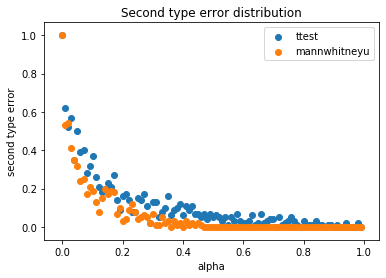

In [29]:
alphas = []
second_type_errors_ttest = []
second_type_errors_mannwhitneyu = []

for alpha in tqdm(arange(0, 1, 0.01)):
        alphas.append(alpha)
        second_type_errors_ttest.append(generate_second_type_error_for_alpha(alpha, 1.5, 1.6, ttest_ind))
        second_type_errors_mannwhitneyu.append(generate_second_type_error_for_alpha(alpha, 1.5, 1.6, mannwhitneyu))

plt.scatter(x=alphas, y=second_type_errors_ttest, label='ttest')
plt.scatter(x=alphas, y=second_type_errors_mannwhitneyu, label='mannwhitneyu')
plt.xlabel("alpha")
plt.ylabel("second type error")
plt.title("Second type error distribution")
plt.legend()
plt.show()

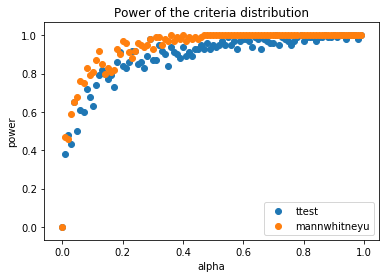

In [30]:
plt.scatter(x=alphas, y=[1 - x for x  in second_type_errors_ttest], label='ttest')
plt.scatter(x=alphas, y=[1 - x for x in second_type_errors_mannwhitneyu], label='mannwhitneyu')
plt.xlabel("alpha")
plt.ylabel("power")
plt.title("Power of the criteria distribution")
plt.legend()
plt.show()